1. Check no missing value. Good?
2. research on feature
3. train/test split
4. EDA

understand the data
relationship between != variables 

- plotting
- correlation(continous)
- cross tab (categorical)
- test


Linear regression



In [89]:
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/


import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

from pandas import DataFrame

from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [105]:
ls datasets #find the location of the data file

 Volume in drive C is Windows
 Volume Serial Number is 283D-E715

 Directory of C:\Users\einst_000\DS-SF-36\classes\datasets

08/21/2017  08:20 PM    <DIR>          .
08/21/2017  08:20 PM    <DIR>          ..
08/21/2017  08:19 PM           808,722 Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools.pdf
08/07/2017  06:40 PM            86,413 dataset-13-walget-train.csv
08/21/2017  06:39 PM            36,202 dataset-energy-efficiency.csv
08/21/2017  08:16 PM         1,599,031 Energy performance of residential buildings.pdf
08/16/2017  06:35 PM               201 pets.csv
               5 File(s)      2,530,569 bytes

 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes

File Not Found


In [62]:
#read the dataset
df = pd.read_csv(os.path.join('datasets', 'dataset-energy-efficiency.csv')) 

In [63]:
df

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [64]:
# see the shape of the dataset
df.shape

(768, 10)

In [65]:
df.describe()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
RC     768 non-null float64
SA     768 non-null float64
WA     768 non-null float64
RA     768 non-null float64
OH     768 non-null float64
OR     768 non-null int64
GA     768 non-null float64
GAD    768 non-null int64
HL     768 non-null float64
CL     768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [67]:
# see header
df.columns.tolist() 

['RC', 'SA', 'WA', 'RA', 'OH', 'OR', 'GA', 'GAD', 'HL', 'CL']

In [68]:
#find out all the null data
df.isnull().sum()

RC     0
SA     0
WA     0
RA     0
OH     0
OR     0
GA     0
GAD    0
HL     0
CL     0
dtype: int64

In [49]:
df.corr()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
RC,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
SA,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
WA,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
RA,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
OH,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
OR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
GA,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
GAD,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
HL,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
CL,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


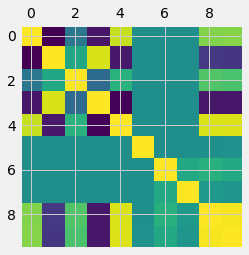

In [50]:
plt.matshow(df.corr())

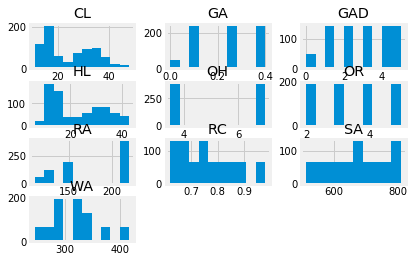

In [86]:
df.hist()
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


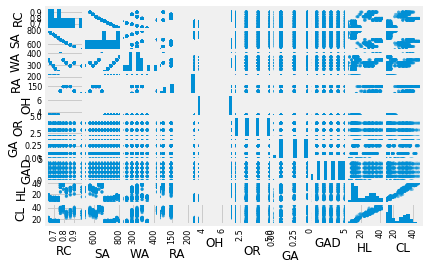

In [118]:
scatter_matrix(df)
plt.show()

In [77]:
summary = df.describe()
summary

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


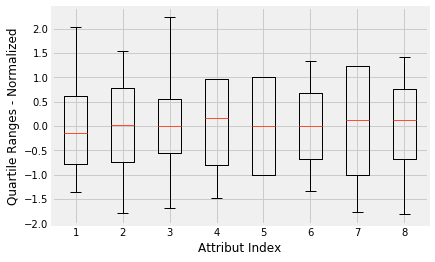

In [78]:
df_normalized = DataFrame.copy(df)
df_normalized.drop(['HL','CL'], axis=1, inplace= True)
ncols = len(df_normalized.columns)

for i in range (ncols):
    mean = summary.iloc[1,i]
    std = summary.iloc[2,i]
    df_normalized.iloc[:,i:(i + 1)] = (df_normalized.iloc[:,i:(i + 1)]  - mean)/ std
    
array = df_normalized.values
plt.boxplot(array)
plt.xlabel('Attribut Index')
plt.ylabel('Quartile Ranges - Normalized')

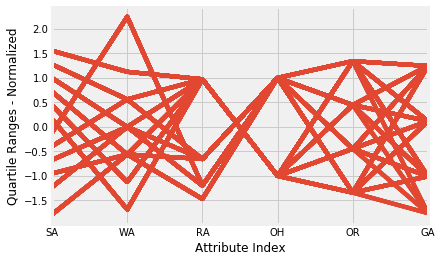

In [79]:
nDataCols = len(df_normalized.columns) -1

for i in range(len(df_normalized.index)):
    dataRow = df_normalized.iloc[i, 1:nDataCols]
    normTarget = df_normalized.iloc[1, nDataCols]
    labelColor = 1.0 / (1.0 + exp(-normTarget))
    dataRow.plot(color=plt.cm.RdYlBu(labelColor), alpha =0.5)
    
plt.xlabel("Attribute Index")
plt.ylabel("Quartile Ranges - Normalized")

In [80]:
# split data into two sets, df_heat , df_cooL
df_heat = df.drop('CL', axis = 1 )
df_cool = df.drop('HL', axis = 1 )

In [83]:
model = smf.ols(formula = 'HL ~ RC + SA + WA + RA + OH + OR + GA + GAD' , data = df_heat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HL   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 21 Aug 2017   Prob (F-statistic):               0.00
Time:                        19:41:40   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0134     19.034      4.414      0.000      46.649     121.378
RC           -64.7734     10.289     -6.295      0.000     -84.973     -44.574
SA            -0.0626      0.013     -4.670      0.000      -0.089      -0.036
WA             0.0361      0.004      9.386      0.000       0.029       0.044
RA            -0.0494      0.008     -6.569      0.000      -0.064      -0.035
OH             4.1700      0.338     12.338      0.000       3.506       4.833
OR            -0.0233      0.095     -0.246      0.805      -0.209       0.163
GA            19.9327      0.814     24.488      0.000      18.335      21.531
GAD            0.2038      0.070      2.915      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.647   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.707
Skew:                           0.044   Prob(JB):                     6.49e-09
Kurtosis:                       4.082   Cond. No.                     2.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.61e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
model = smf.ols(formula = 'CL ~ RC + SA + WA + RA + OH + OR + GA + GAD' , data = df_cool).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CL   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Mon, 21 Aug 2017   Prob (F-statistic):               0.00
Time:                        19:41:41   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.2457     20.765      4.683      0.000      56.483     138.009
RC           -70.7877     11.225     -6.306      0.000     -92.824     -48.751
SA            -0.0661      0.015     -4.519      0.000      -0.095      -0.037
WA             0.0225      0.004      5.365      0.000       0.014       0.031
RA            -0.0443      0.008     -5.404      0.000      -0.060      -0.028
OH             4.2838      0.369     11.618      0.000       3.560       5.008
OR             0.1215      0.103      1.176      0.240      -0.081       0.324
GA            14.7171      0.888     16.573      0.000      12.974      16.460
GAD            0.0407      0.076      0.534      0.594      -0.109       0.190
==============================================================================
Omnibus:                      104.668   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.547
Skew:                           0.767   Prob(JB):                     8.65e-51
Kurtosis:                       5.203   Cond. No.                     2.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.61e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
X = df_heat.drop('HL', axis=1)
y = df_heat.HL
validation_size =0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = validation_size, random_state = seed)

In [109]:
seed =7
scoring = 'accuracy'

In [113]:
# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Classification and Regression Trees (CART).
# Gaussian Naive Bayes (NB).
# Support Vector Machines (SVM)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
# names = []
# for name, model in models:
#     kfold = model_selection.KFold(n_splits=10, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

IndexError: list index out of range

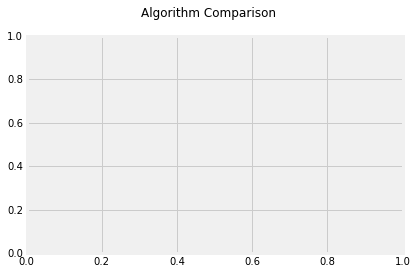

In [114]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [116]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

ValueError: Unknown label type: 'continuous'